Import Libraries 

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
color = sns.color_palette()

Importing data files

In [62]:
plydata = pd.read_csv('D:\BI\Python\Python Assignment 1\playstore-analysis (2) (1).csv',encoding= 'unicode_escape')

To show the dataset

In [63]:
plydata.head(11)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600.0,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3 and up
6,Smoke Effect Photo Maker - Smoke Editor,ART_AND_DESIGN,3.8,178,19000.0,"50,000+",Free,0,Everyone,Art & Design,"April 26, 2018",1.1,4.0.3 and up
7,Infinite Painter,ART_AND_DESIGN,4.1,36815,29000.0,"1,000,000+",Free,0,Everyone,Art & Design,"June 14, 2018",6.1.61.1,4.2 and up
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791,33000.0,"1,000,000+",Free,0,Everyone,Art & Design,"September 20, 2017",2.9.2,3.0 and up
9,Kids Paint Free - Drawing Fun,ART_AND_DESIGN,4.7,121,3100.0,"10,000+",Free,0,Everyone,Art & Design;Creativity,"July 3, 2018",2.8,4.0.3 and up


To get information about datatypes

In [64]:
plydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


Task 1. Data Cleanup & Missing Value Treatement

a. Drop records where rating is missing since rating is our target/study variable

In [65]:
plydata.isnull().sum().sort_values(ascending=False)

Rating            1474
Current Ver          8
Android Ver          3
Type                 1
Content Rating       1
App                  0
Category             0
Reviews              0
Size                 0
Installs             0
Price                0
Genres               0
Last Updated         0
dtype: int64

In [66]:
plydata1=plydata.dropna(subset=['Rating'])

In [67]:
plydata1.isnull().sum().sort_values(ascending=False)

Current Ver       4
Android Ver       3
Content Rating    1
App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Genres            0
Last Updated      0
dtype: int64

b. Check the null values for the Android Ver column. 

In [68]:
print(f"Missing Values :\n{plydata1['Android Ver'].isnull().sum()}")

Missing Values :
3


In [69]:
print (plydata1[plydata1.isna().any(axis=1)])

                                           App            Category  Rating  \
15             Learn To Draw Kawaii Characters      ART_AND_DESIGN     3.2   
1553                      Market Update Helper  LIBRARIES_AND_DEMO     4.1   
4453                    [substratum] Vacuum: P     PERSONALIZATION     4.4   
4490                      Pi Dark [substratum]     PERSONALIZATION     4.5   
6322                    Virtual DJ Sound Mixer               TOOLS     4.2   
7333                               Dots puzzle              FAMILY     4.0   
10472  Life Made WI-Fi Touchscreen Photo Frame                 1.9    19.0   

      Reviews          Size    Installs  Type     Price Content Rating  \
15         55   2700.000000      5,000+  Free         0       Everyone   
1553    20145     11.000000  1,000,000+  Free         0       Everyone   
4453      230  11000.000000      1,000+  Paid     $1.49       Everyone   
4490      189   2100.000000     10,000+  Free         0       Everyone   
6322 

In [72]:
plydata2 = plydata1.drop(10472)
# Verification
verify = plydata2[plydata2["App"]=='Life Made WI-Fi Touchscreen Photo Frame']
print (verify)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [73]:
import statistics
Android_list = plydata2['Android Ver'].to_list()
# print(Android_list)
# O/P ['4.2 and up', '1.5 and up', nan, nan, '4.0 and up', '4.0 and up']

# Did Manual work(illegal)
Al=[4.2,1.5,4.0,4.0]
# print(Al)
# print(statistics.mode(Al))
plydata3 = plydata2.fillna(statistics.mode(Al))

print(plydata3.loc[[4453]])
print('--------------------------------------------------------------------')
print(plydata3.loc[[4490]])

                         App         Category  Rating Reviews     Size  \
4453  [substratum] Vacuum: P  PERSONALIZATION     4.4     230  11000.0   

     Installs  Type  Price Content Rating           Genres   Last Updated  \
4453   1,000+  Paid  $1.49       Everyone  Personalization  July 20, 2018   

     Current Ver Android Ver  
4453         4.4         4.0  
--------------------------------------------------------------------
                       App         Category  Rating Reviews    Size Installs  \
4490  Pi Dark [substratum]  PERSONALIZATION     4.5     189  2100.0  10,000+   

      Type Price Content Rating           Genres    Last Updated Current Ver  \
4490  Free     0       Everyone  Personalization  March 27, 2018         1.1   

     Android Ver  
4490         4.0  


Current ver – replace with most common value

In [76]:
# current_ver Nan values already replace with most frequest value i.e Mode in above execution
#To check there is Null values present or not

plydata3.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [77]:
print(f"Missing Values :{plydata3['Current Ver'].isnull().sum()}")

Missing Values :0


Task 2. Data clean up – correcting the data types

a. Which all variables need to be brought to numeric types?

In [78]:
plydata3['Reviews'] = plydata3['Reviews'].astype(int)
plydata3['Size'] = plydata3['Size'].astype(int)
# Additional conversion
plydata3['Last Updated'] = plydata3['Last Updated'].astype('datetime64[ns]')

b. Price variable – remove $ sign and convert to float


In [79]:
plydata3['Price'] = plydata3['Price'].str.replace('$', '')

C:\Users\10073788\AppData\Local\Temp\ipykernel_17464\2766818184.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  plydata3['Price'] = plydata3['Price'].str.replace('$', '')


In [80]:
plydata3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [81]:
plydata3['Price'] = plydata3['Price'].astype(float)

In [82]:
plydata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   object        
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(2), object(8)
memory usage: 1.2+ MB


c. Installs – remove ‘,’ and ‘+’ sign, convert to integer

In [83]:
plydata3['Installs'] = plydata3['Installs'].str.replace('+','')

C:\Users\10073788\AppData\Local\Temp\ipykernel_17464\2643858545.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  plydata3['Installs'] = plydata3['Installs'].str.replace('+','')


In [84]:
plydata3['Installs'] = plydata3['Installs'].str.replace(',', '')

In [85]:
plydata3['Installs'] = plydata3['Installs'].astype(int)

In [86]:
plydata3.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up


In [87]:
plydata3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             9366 non-null   object        
 1   Category        9366 non-null   object        
 2   Rating          9366 non-null   float64       
 3   Reviews         9366 non-null   int32         
 4   Size            9366 non-null   int32         
 5   Installs        9366 non-null   int32         
 6   Type            9366 non-null   object        
 7   Price           9366 non-null   float64       
 8   Content Rating  9366 non-null   object        
 9   Genres          9366 non-null   object        
 10  Last Updated    9366 non-null   datetime64[ns]
 11  Current Ver     9366 non-null   object        
 12  Android Ver     9366 non-null   object        
dtypes: datetime64[ns](1), float64(2), int32(3), object(7)
memory usage: 1.1+ MB


Task 3.Sanity checks – check for the following and handle accordingly

a. Avg. rating should be between 1 and 5, as only these values are allowed on the play 
store.
i. Are there any such records? Drop if so.

In [88]:
pd.unique(plydata3[['Rating']].values.ravel())
#.ravel()-->return 1D array with all the input-array elements

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

b. Reviews should not be more than installs as only those who installed can review the 
app.
i. Are there any such records? Drop if so.

In [92]:
df = pd.DataFrame()
df = plydata3[plydata3.Reviews >= plydata3.Installs]

In [93]:
df.shape

(9, 13)

In [94]:
df.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000,1,Free,0.00,Everyone,Medical,2018-08-02,1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516,10000,Paid,2.49,Everyone,Lifestyle,2018-07-30,Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000,1,Paid,1.49,Everyone,Arcade,2017-02-08,1.0.4,2.3 and up
6183,Revita.bg,HEALTH_AND_FITNESS,4.8,10,4000,10,Free,0.00,Everyone,Health & Fitness,2018-06-13,3.55,4.0 and up
6700,Brick Breaker BR,GAME,5.0,7,19000,5,Free,0.00,Everyone,Arcade,2018-07-23,1.0,4.1 and up
7147,CB Heroes,SOCIAL,5.0,5,1800,5,Free,0.00,Everyone,Social,2018-08-04,1.2.4,5.0 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100,10,Free,0.00,Everyone,Arcade,2017-03-11,0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200,10,Free,0.00,Teen,Social,2018-07-23,1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000,1,Paid,0.99,Everyone,Arcade,2017-03-03,1.0,2.3 and up


In [95]:
plydata4= plydata3.drop([2454,4663,5917,6183,6700,7147,7402,8591,10697])

In [96]:
df = pd.DataFrame()
df = plydata4[plydata4.Reviews >= plydata4.Installs]
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


Task 4. . Identify and handle outliers 

a. Price column

C:\Users\10073788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


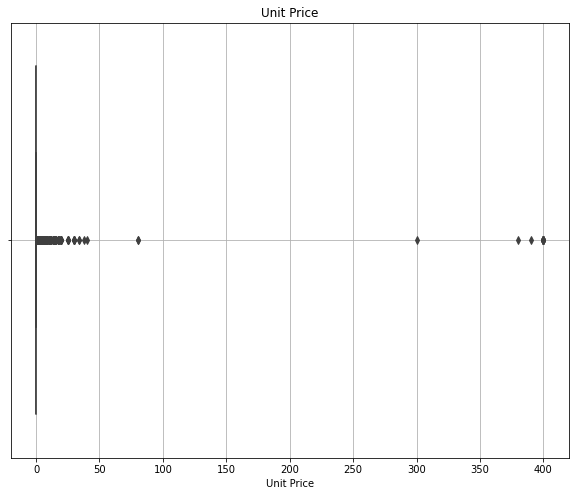

In [97]:
plt.subplots(figsize=(10,8))
sns.boxplot(plydata4.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid(linestyle='-')
plt.show()

In [101]:
rslt_df = plydata4[plydata4['Price'] == 200]
print(rslt_df)
# old data analysis (before data cleanning)
# rslt_df = data[data['Price'] == '$200.00']
# print(rslt_df)

Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


Yes we can expect apps on the play store to cost $200

C:\Users\10073788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


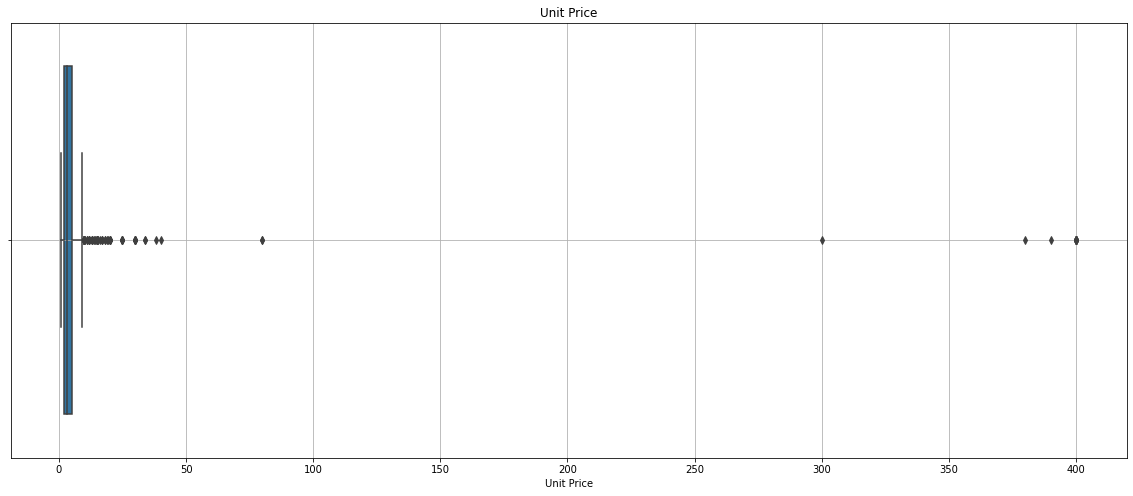

In [102]:
usful_df = plydata4[plydata4['Price'] != 0]
# usful_df
plt.subplots(figsize=(20,8))
sns.boxplot(usful_df.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

In [103]:
limit_data = plydata4[plydata4['Price'] < 30]
limit_data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [104]:
limit_data.shape

(9336, 13)

After dropping the useless records, make the suitable plot again to identify outliers

C:\Users\10073788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


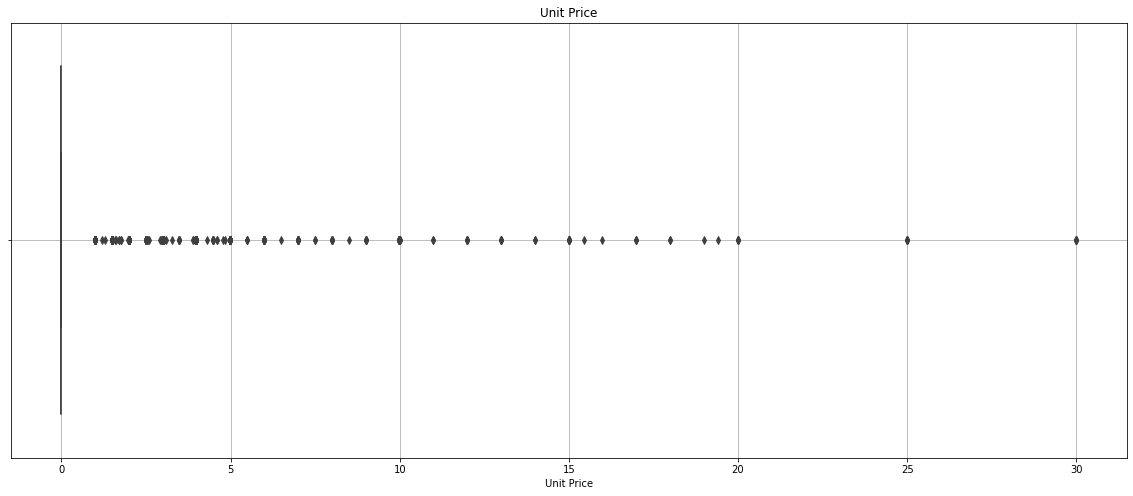

In [115]:
plt.subplots(figsize=(20,8))
sns.boxplot(limit_data.Price)

plt.xlabel('Unit Price')
plt.title('Unit Price')
plt.grid()
plt.show()

b.  Reviews column

Category
GAME                   1585419555
COMMUNICATION           815461799
SOCIAL                  621241066
FAMILY                  410223081
TOOLS                   273184168
PHOTOGRAPHY             213516607
SHOPPING                115041033
PRODUCTIVITY            114116717
VIDEO_PLAYERS           110379692
PERSONALIZATION          89345815
SPORTS                   70829568
TRAVEL_AND_LOCAL         62617772
ENTERTAINMENT            59178154
NEWS_AND_MAGAZINES       54399899
EDUCATION                39595010
HEALTH_AND_FITNESS       37893612
MAPS_AND_NAVIGATION      30659060
BOOKS_AND_REFERENCE      21958660
FINANCE                  17550406
WEATHER                  14604695
BUSINESS                 13954086
LIFESTYLE                12871520
FOOD_AND_DRINK            8883009
DATING                    7291039
HOUSE_AND_HOME            3976004
COMICS                    3381945
ART_AND_DESIGN            1714372
MEDICAL                   1585618
AUTO_AND_VEHICLES         1163630
LIBRA

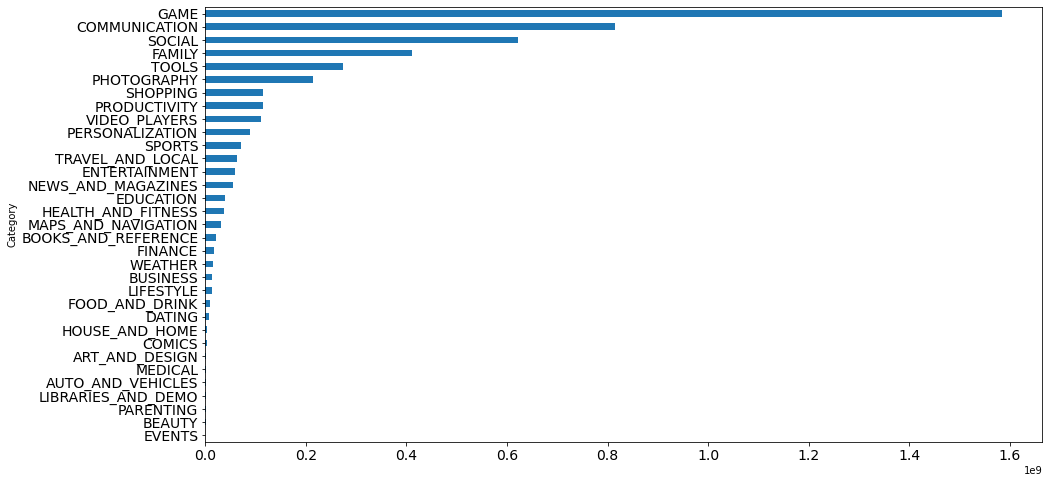

In [105]:
total=plydata4.groupby('Category')['Reviews'].sum().sort_values()
plt.subplots(figsize=(15,8))
total.plot(kind='barh', fontsize=14)
print(total.sort_values(ascending=False))
plt.show()

Top 5 Reviewed Apps by Category Category

GAME 1585419555
COMMUNICATION 815461799
SOCIAL 621241071
FAMILY 410223081
TOOLS 273184168

In [108]:
limit_data_by_review = plydata4[plydata4['Reviews'] < 1000000]
limit_data_by_review.head(6)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8700,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5600,50000,Free,0.0,Everyone,Art & Design,2017-03-26,1.0,2.3 and up


In [109]:
limit_data_by_review.shape

(8653, 13)

We found 8655 rows of limited data to apps with < 1 Million reviews

C. Installs

In [110]:
val = plydata4.Installs.quantile(0.95) # 95th percentile
print(val)

100000000.0


10000000.0 is 95th percentile of Installs

In [111]:
# Verification
x = plydata4.Installs.quantile() > val
print (x)

False


Data analysis to answer business questions

Task 5. What is the distribution of ratings like? (use Seaborn) More skewed towards higher/lower 
values?

C:\Users\10073788\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


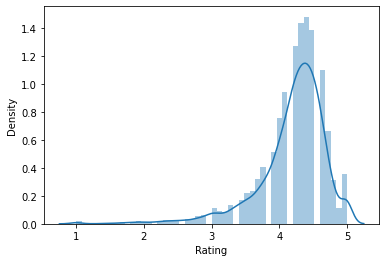

In [119]:
sns.distplot(plydata4['Rating'])
plt.show()

It is Left-Skewed (Negative Skewness)
A left skewed distribution is sometimes called a negatively skewed distribution because it’s long tail is on the negative direction on a number line.The mean is also on the left of the peak.
Here you can see three measures position on the plot. So, you will find that: mean less than the mode median less than the mode mean less than median Here the distribution tells that most of the rating is in between 4 to 5.

b. What is the implication of this on your analysis?

Real life distributions are usually skewed. If there are too much skewness in the data, then many statistical model don’t work. So in skewed data, the tail region may act as an outlier for the statistical model and we know that outliers adversely affect the model’s performance especially regression-based models. So there is a necessity to transform the skewed data to close enough to a Gaussian distribution or Normal distribution. This will allow us to try more number of statistical model. Conclusion: If we have a skewed data then it may harm our results. So, in order to use a skewed data we have to apply a log transformation over the whole set of values to discover patterns in the data and make it usable for the statistical model.

Task 6. What are the top Content Rating values?

In [120]:
plydata4['Content Rating'].value_counts()

Everyone           7412
Teen               1083
Mature 17+          461
Everyone 10+        397
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

a. Are there any values with very few records?

Yes. 'Unrated' Content Rating has value 1 and Adults only 18+ -->3

b. If yes, drop those as they won’t help in the analysis

In [121]:
Adult_rating = plydata4[plydata4['Content Rating'] == 'Adults only 18+'].index.to_list()
unrated =plydata4[plydata4['Content Rating'] == 'Unrated'].index.to_list()
plydata4.drop(Adult_rating, inplace = True)
plydata4.drop(unrated, inplace = True)
plydata4['Content Rating'].value_counts()

Everyone        7412
Teen            1083
Mature 17+       461
Everyone 10+     397
Name: Content Rating, dtype: int64

In [123]:
# Pie Diagram
import plotly.graph_objects as go

fig = go.Figure(go.Pie(
    name = "",
    values = [7414,1083,461,397],
    labels = ['Everyone','Teen','Mature 17+','Everyone 10+'],
))
fig.show()


ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Task 7. Effect of size on rating

a. Make a joinplot to understand the effect of size on rating

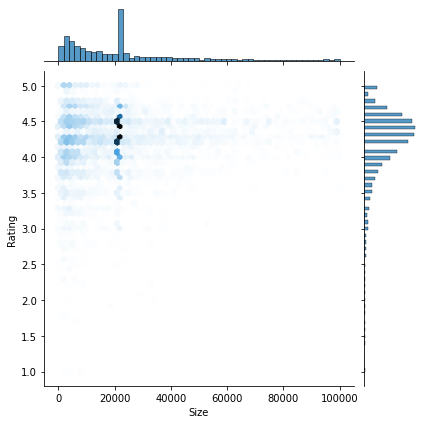

In [124]:
sns.jointplot(x=plydata4['Size'],y=plydata4['Rating'],data=plydata4,kind='hex')
plt.show()

b. Do you see any patterns?

Yes, patterns can be observed between Size and Rating ie. their is correlation between Size and Rating.

c. How do you explain the pattern?

Generally on increasing Rating, Size of App also increases. But this is not always true ie. for higher Rating, their is constant Size. Thus we can conclude that their is positive correlation between Size and Rating.

Task 8. Effect of price on rating

a. Make a jointplot (with regression line

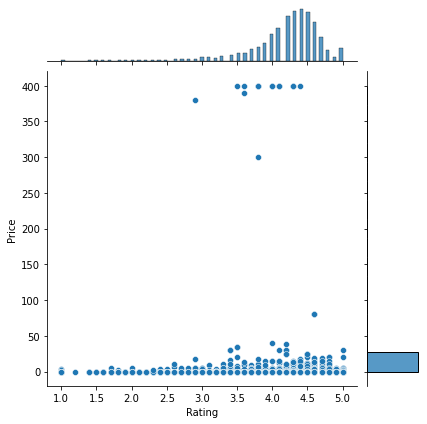

In [125]:
sns.jointplot(x ="Rating" , y = "Price" ,data = plydata4)
plt.show()

b. What pattern do you see?

Generally on increasing the Price, Rating remains almost constant greater than 4.

c. How do you explain the pattern?

Since on increasing the Price, Rating remains almost constant greater than 4. Thus it can be concluded that their is very weak Positive correlation between Rating and Price.

In [127]:
plydata4.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.068461,0.079184,0.051704,-0.021885
Reviews,0.068461,1.000000,0.125437,0.641597,-0.009828
Size,0.079184,0.125437,1.000000,0.075341,-0.025662
Installs,0.051704,0.641597,0.075341,1.000000,-0.011900
Price,-0.021885,-0.009828,-0.025662,-0.011900,1.000000


d. Replot the data, this time with only records with price > 0

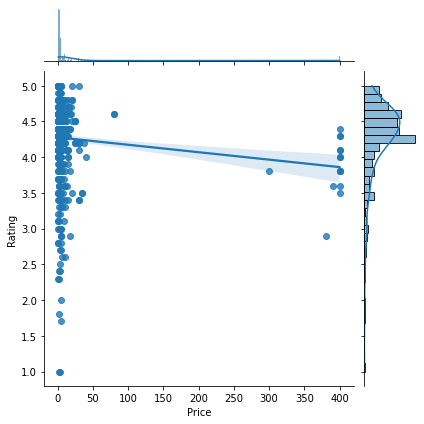

In [126]:
Price_greaterthan_zero = plydata4[plydata4['Price'] > 0]
sns.jointplot(x ="Price" , y = "Rating" ,data = Price_greaterthan_zero, kind = "reg" )
plt.show()

e. Does the pattern change?

Yes, On limiting the record with Price > 0, the overall pattern changed a slight ie their is very weakly Negative Correlation between Price and Rating.

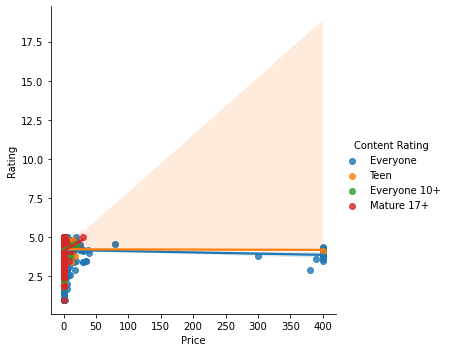

In [128]:
sns.lmplot(x='Price', y='Rating', hue ='Content Rating', data=plydata4)
plt.show()

f. What is your overall inference on the effect of price on the rating

Generally increasing the Prices, doesn't have signifcant effect on Higher Rating. For Higher Price, Rating is High and almost constant ie greater than 4

Task 9.Look at all the numeric interactions together – 
a. Make a pairplort with the colulmns - 'Reviews', 'Size', 'Rating', 'Price

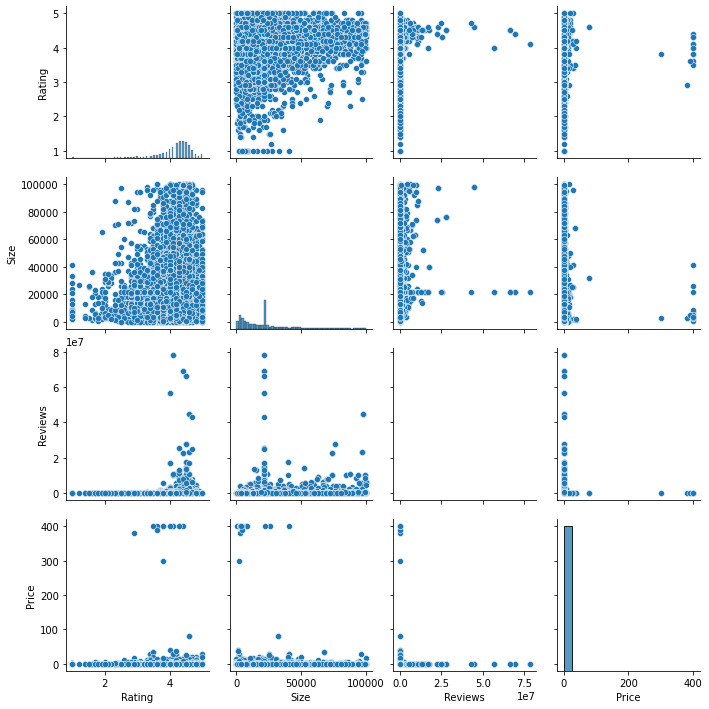

In [130]:
sns.pairplot(plydata4,vars=['Rating','Size', 'Reviews', 'Price'])
plt.show()

Task 10. Rating vs. content rating

a. Make a bar plot displaying the rating for each content rating

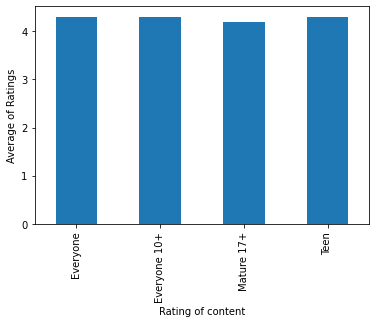

In [131]:
a = plydata4['Rating'].groupby(plydata4['Content Rating']).median().plot(kind = 'bar')
a.set(xlabel ='Rating of content', ylabel = 'Average of Ratings')
plt.show()

b. Which metric would you use? Mean? Median? Some other quantile?

We must use Median in this case as we are having Outliers in Rating. Because in case of Outliers , median is the best measure of central tendency.

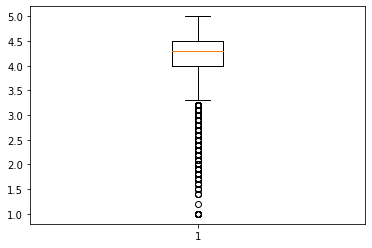

In [132]:
plt.boxplot(plydata4['Rating'])
plt.show()

c. Choose the right metric and plot

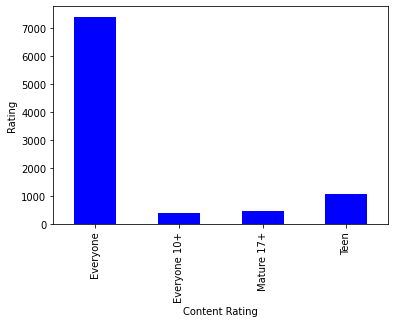

In [133]:
plydata4.groupby(['Content Rating'])['Rating'].count().plot.bar(color="b")
plt.ylabel('Rating')
plt.show()

Task 11. Content rating vs. size vs. rating – 3 variables at a time

a. Create 5 buckets (20% records in each) based on Size

C:\Users\sanke\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



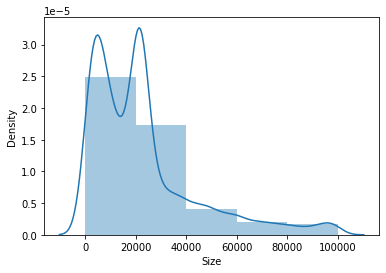

In [67]:
#Checking skewness
sns.distplot(plydata4["Size"], bins=5)
plt.show()

In [134]:
bins=[0, 4600, 12000, 21516, 32000, 100000]
plydata4['Size_Buckets'] = pd.cut(plydata4['Size'], bins, labels=['VERY LOW','LOW','MED','HIGH','VERY HIGH'])
pd.pivot_table(plydata4, values='Rating', index='Size_Buckets', columns='Content Rating')

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,4.115063,4.188889,3.951429,4.224490
LOW,4.161317,4.207143,4.129592,4.209655
MED,4.242463,4.262602,4.091975,4.205630
HIGH,4.179122,4.209375,4.168333,4.213158
VERY HIGH,4.208134,4.287805,4.197170,4.279603


b. By Content Rating vs. Size buckets, get the rating (20th percentile) for each 
combination

In [135]:
plydata4.Size.quantile([0.2, 0.4,0.6,0.8])

0.2     5100.0
0.4    14000.0
0.6    21516.0
0.8    34000.0
Name: Size, dtype: float64

In [136]:
plydata4.Rating.quantile([0.2, 0.4,0.6,0.8])

0.2    3.9
0.4    4.2
0.6    4.4
0.8    4.6
Name: Rating, dtype: float64

c. Make a heatmap of this
   i. Annotated
   ii. Greens color map

In [138]:
Size_Buckets =pd.pivot_table(plydata4, values='Rating', index='Size_Buckets', columns='Content Rating', 
                     aggfunc=lambda x:np.quantile(x,0.2))
Size_Buckets

Content Rating,Everyone,Everyone 10+,Mature 17+,Teen
Size_Buckets,,,,
VERY LOW,3.8,3.84,3.28,3.90
LOW,3.8,3.94,3.64,3.88
MED,4.0,4.10,3.90,3.90
HIGH,3.9,4.00,3.90,4.00
VERY HIGH,3.9,4.10,4.00,4.00


Annoted

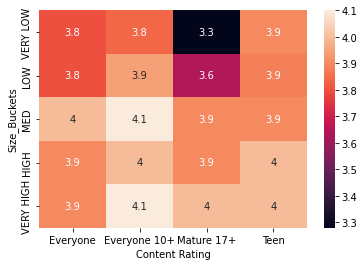

In [140]:
sns.heatmap(Size_Buckets, annot = True)
plt.show()

Green color Heatmap

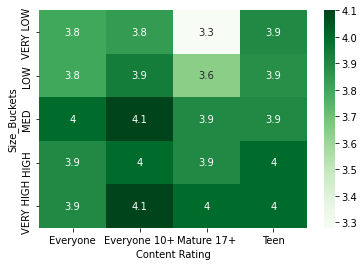

In [139]:
sns.heatmap(Size_Buckets, annot=True, cmap='Greens')
plt.show()

d. What’s your inference? Are lighter apps preferred in all categories? Heavier? Some?

Based on analysis, its not true that lighter apps are preferred in all categories. Because apps with size 40k-60k and 80k-100k have got the highest rating in all cateegories. So, in general we can conclude that heavier apps are preferred in all categories.